<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными-и-предобработка" data-toc-modified-id="Знакомство-с-данными-и-предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными и предобработка</a></span></li><li><span><a href="#Задачи" data-toc-modified-id="Задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задачи</a></span><ul class="toc-item"><li><span><a href="#Метрики" data-toc-modified-id="Метрики-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Метрики</a></span></li><li><span><a href="#Тема-письма" data-toc-modified-id="Тема-письма-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тема письма</a></span></li><li><span><a href="#День-недели" data-toc-modified-id="День-недели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>День недели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Mailfit

Предоставлены обезличенные данные по email-рассылкам. Содержание:
- Название рассылки
- Название кампании
- Направление
- Месяц
- Дата
- Год
- Номер недели
- День недели
- День недели.1
- Время
- Веб-версия
- Тема письма
- Сегмент
- Отправлено
- Доставлено
- Открытия
- Клики
- Баунсы (Все ошибки)
- Отписка
- UTM Метка
- Пользователей на сайте
- Воронка продаж. Шаг 1
- Воронка продаж. Шаг 2
- Воронка продаж. Шаг 3

Задачи:
- Рассчитать основные метрики (Delivery Rate, Open Rate, Click To Open Rate, Unsubscribe Rate);
- Выявить лучшую тему письма;
- Определить оптимальный день недели для планирования рассылок.

## Знакомство с данными и предобработка

In [1]:
# отключим предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# читаем и сохраняем файл
df = pd.read_csv('Data.csv')

In [4]:
# уберем ограничения отображаемых столбцов
pd.set_option('display.max_columns', None)

In [5]:
# настроим для float отображение только 2 цифр после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
df.head()

,Название рассылки,Название кампании,Направление,Месяц,Дата,Год,Номер недели,День недели,День недели.1,Время,Веб-версия,Тема письма,Сегмент,Отправлено,Доставлено,Открытия,Клики,Баунсы (Все ошибки),Отписки,UTM Метка,Пользователей на сайте,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3
0,Название рассылки 1,Название кампании 1,Email,Октябрь,27.10.2021,2021,43,3,03-среда,19:24,#ССЫЛКА,Тема письма 1,Сегмент 1,780 789,741 750,148 350,17 802,39 039,7 417,Метка 1,16 378,6337,6210,5154
1,Название рассылки 10,Название кампании 10,Email,Ноябрь,05.11.2021,2021,45,5,05-пятница,12:02,#ССЫЛКА,Тема письма 10,Сегмент 2,719 370,683 402,123 012,11 071,35 969,6 834,Метка 10,10 296,3558,3096,2539
2,Название рассылки 100,Название кампании 100,Email,Апрель,11.04.2022,2022,15,1,01-понедельник,16:26,#ССЫЛКА,Тема письма 100,Сегмент 3,1 201 415,1 141 344,182 615,15 340,60 071,11 413,Метка 100,13 959,3370,2864,2263
3,Название рассылки 101,Название кампании 101,Email,Апрель,12.04.2022,2022,15,2,02-вторник,16:26,#ССЫЛКА,Тема письма 101,Сегмент 1,1 393 827,1 324 136,264 827,10 328,69 691,13 241,Метка 101,8 986,5116,4277,3208
4,Название рассылки 102,Название кампании 102,Email,Апрель,13.04.2022,2022,15,3,03-среда,16:26,#ССЫЛКА,Тема письма 102,Сегмент 2,1 276 821,1 212 980,218 336,15 720,63 841,12 130,Метка 102,10 847,2817,2287,1670


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Название рассылки       218 non-null    object
 1   Название кампании       218 non-null    object
 2   Направление             218 non-null    object
 3   Месяц                   218 non-null    object
 4   Дата                    218 non-null    object
 5   Год                     218 non-null    int64 
 6   Номер недели            218 non-null    int64 
 7   День недели             218 non-null    int64 
 8   День недели.1           218 non-null    object
 9   Время                   218 non-null    object
 10  Веб-версия              218 non-null    object
 11  Тема письма             218 non-null    object
 12  Сегмент                 218 non-null    object
 13  Отправлено              218 non-null    object
 14  Доставлено              218 non-null    object
 15  Открыт

In [8]:
df.describe()

,Год,Номер недели,День недели,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3
count,218.00,218.00,218.00,218.00,218.00,218.00
mean,2021.39,27.82,3.44,5717.06,4967.91,3878.60
std,0.49,18.29,1.45,4064.84,3602.24,2849.93
min,2021.00,1.00,1.00,579.00,551.00,414.00
25%,2021.00,10.25,2.00,2845.00,2493.00,1834.75
50%,2021.00,28.00,4.00,4663.00,3979.50,3164.00
75%,2022.00,46.00,5.00,7507.75,6380.25,5034.75
max,2022.00,52.00,6.00,23427.00,19023.00,15028.00


In [9]:
# дубликаты
df.duplicated().sum()

0

<div class='alert alert-info'><b>
    
- пропусков нет
- дубликатов нет    
- типы данных не соответствуют
- данные за 2021-2022 гг
- нет 7 дня недели    
    
    
</b></div>

In [10]:
# уникальные значения столбца с номером и названием дня недели
df['День недели.1'].unique()

array(['03-среда', '05-пятница', '01-понедельник', '02-вторник',
       '04-четверг', '06-суббота'], dtype=object)

In [11]:
# удалим ненужные столбцы
df.drop(df.columns[[0, 1, 2, 6, 7, 9, 10, 12, 17, 19, 20]], axis=1, inplace=True)

In [12]:
# изменим названия столбцов для удобства
columns_list = df.columns
new_columns_list = ['month', 'date', 'year', 'weekday', 'theme', 'sent',
                    'delivered', 'opened', 'click', 'unsubscribe',
                    'step_1', 'step_2', 'step_3']
columns_change_dict = {k: v for k, v in zip(columns_list, new_columns_list)}
df.columns = df.columns.map(columns_change_dict)

df.columns

Index(['month', 'date', 'year', 'weekday', 'theme', 'sent', 'delivered',
       'opened', 'click', 'unsubscribe', 'step_1', 'step_2', 'step_3'],
      dtype='object')

In [13]:
# в теме письма и день недели оставим только числа
df.theme = df.theme.str.replace('\D+', '', regex=True)
df.weekday = df.weekday.str.replace('\D+', '', regex=True)

In [14]:
# приведём дату к соответствующему типу 
df.date = pd.to_datetime(df.date, format='%d.%m.%Y')

In [15]:
# функция, возвращающая уникальные значения и их количество по каждому столбцу в дф
def df_unique(df):
    for i in df.columns:
        print(i, '\n' , df[i].unique(), '\n', df[i].nunique(), end='\n'*2)

In [16]:
df_unique(df)

month 
 ['Октябрь' 'Ноябрь' 'Апрель' 'Май' 'Июнь' 'Июль' 'Август' 'Сентябрь'
 'Декабрь' 'Январь' 'Февраль' 'Март'] 
 12

date 
 <DatetimeArray>
['2021-10-27 00:00:00', '2021-11-05 00:00:00', '2022-04-11 00:00:00',
 '2022-04-12 00:00:00', '2022-04-13 00:00:00', '2022-04-14 00:00:00',
 '2022-04-15 00:00:00', '2022-04-22 00:00:00', '2022-04-26 00:00:00',
 '2021-11-10 00:00:00',
 ...
 '2022-02-08 00:00:00', '2022-02-10 00:00:00', '2022-02-14 00:00:00',
 '2022-02-18 00:00:00', '2022-02-23 00:00:00', '2022-03-10 00:00:00',
 '2022-03-15 00:00:00', '2022-03-18 00:00:00', '2022-03-24 00:00:00',
 '2022-03-28 00:00:00']
Length: 101, dtype: datetime64[ns] 
 101

year 
 [2021 2022] 
 2

weekday 
 ['03' '05' '01' '02' '04' '06'] 
 6

theme 
 ['1' '10' '100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '11'
 '110' '111' '112' '113' '114' '115' '116' '117' '118' '119' '12' '120'
 '121' '122' '123' '124' '125' '126' '127' '128' '129' '13' '130' '131'
 '132' '133' '134' '135' '136' '137' '138' 

В столбцах есть кодировка неразрывного пробела "\xa0". Уберём

In [17]:
for col in df.columns[5:10]:
    df[col] = df[col].str.replace('\\xa0', '', regex=True)

In [18]:
# приведём к числовому типу
for col in df.columns[3:10]:
    df[col] = df[col].astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        218 non-null    object        
 1   date         218 non-null    datetime64[ns]
 2   year         218 non-null    int64         
 3   weekday      218 non-null    int32         
 4   theme        218 non-null    int32         
 5   sent         218 non-null    int32         
 6   delivered    218 non-null    int32         
 7   opened       218 non-null    int32         
 8   click        218 non-null    int32         
 9   unsubscribe  218 non-null    int32         
 10  step_1       218 non-null    int64         
 11  step_2       218 non-null    int64         
 12  step_3       218 non-null    int64         
dtypes: datetime64[ns](1), int32(7), int64(4), object(1)
memory usage: 16.3+ KB


In [20]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,218,2021-12-01 15:57:47.889908224,2021-04-15 00:00:00,2021-10-30 18:00:00,2021-12-11 12:00:00,2022-01-25 00:00:00,2022-05-20 00:00:00,NaN
year,218.00,2021.39,2021.00,2021.00,2021.00,2022.00,2022.00,0.49
weekday,218.00,3.44,1.00,2.00,4.00,5.00,6.00,1.45
theme,218.00,109.50,1.00,55.25,109.50,163.75,218.00,63.08
sent,218.00,1476655.67,510034.00,930482.50,1497056.00,1988811.00,2492076.00,587458.73
delivered,218.00,1442693.60,499833.00,912419.00,1454843.00,1943931.75,2441119.00,575732.60
opened,218.00,196476.20,50529.00,127877.75,177669.00,256646.00,436664.00,91896.22
click,218.00,15915.11,1971.00,9626.00,13620.00,19962.00,47292.00,9326.53
unsubscribe,218.00,37804.87,1036.00,5504.25,9192.00,15963.00,303772.00,70871.02
step_1,218.00,5717.06,579.00,2845.00,4663.00,7507.75,23427.00,4064.84


<div class='alert alert-info'><b>
    
- привели типы данных к соответствующим
- данные за период с 04.21 по 05.22
- в 7 день недели (воскресенье) рассылка не проводится
- тем для писем 218 и все уникальные
    
</b></div>

## Задачи

### Метрики

Рассчитаем метрики Delivery Rate, Open Rate, Click To Open Rate, Unsubscribe Rate помесяцам каждого года

In [21]:
# содадим столбец с номером месяца
df['month_num'] = df.date.dt.month

In [22]:
# создадим дф с группировкой по году и месяцу с суммой активностей для правильного рассчёта метрик
df_sum = df.groupby(['year','month_num'], as_index=False)\
                    [['sent', 'delivered', 'opened', 'click', 'unsubscribe']].sum()

In [23]:
# создадим столбец месяц-год
df_sum['year_month'] = df_sum.month_num.astype('str') + '-' + df_sum.year.astype('str')
df_sum.year_month = df_sum.year_month.apply(lambda x: dt.datetime.strptime(x, '%m-%Y'))

In [24]:
# создадим дф с метриками
df_metr = pd.DataFrame()
df_metr['year_month'] = df_sum.year_month
df_metr['DR'] = df_sum.delivered/df_sum.sent*100
df_metr['OR'] = df_sum.opened/df_sum.delivered * 100
df_metr['CTOR'] = df_sum.click/df_sum.opened * 100
df_metr['UR'] = df_sum.unsubscribe/df_sum.delivered * 100
df_metr

,year_month,DR,OR,CTOR,UR
0,2021-04-01,95.00,15.54,9.18,0.69
1,2021-05-01,95.87,15.07,9.05,0.63
2,2021-06-01,98.11,15.30,7.56,0.62
3,2021-07-01,98.08,14.84,7.44,0.60
4,2021-08-01,98.18,15.27,7.33,0.56
5,2021-09-01,97.48,12.00,8.09,0.56
6,2021-10-01,97.26,13.64,8.44,2.08
7,2021-11-01,97.82,13.24,8.30,2.79
8,2021-12-01,98.18,13.48,7.90,5.33
9,2022-01-01,98.14,12.98,8.24,4.02


<a id='metr'></a>

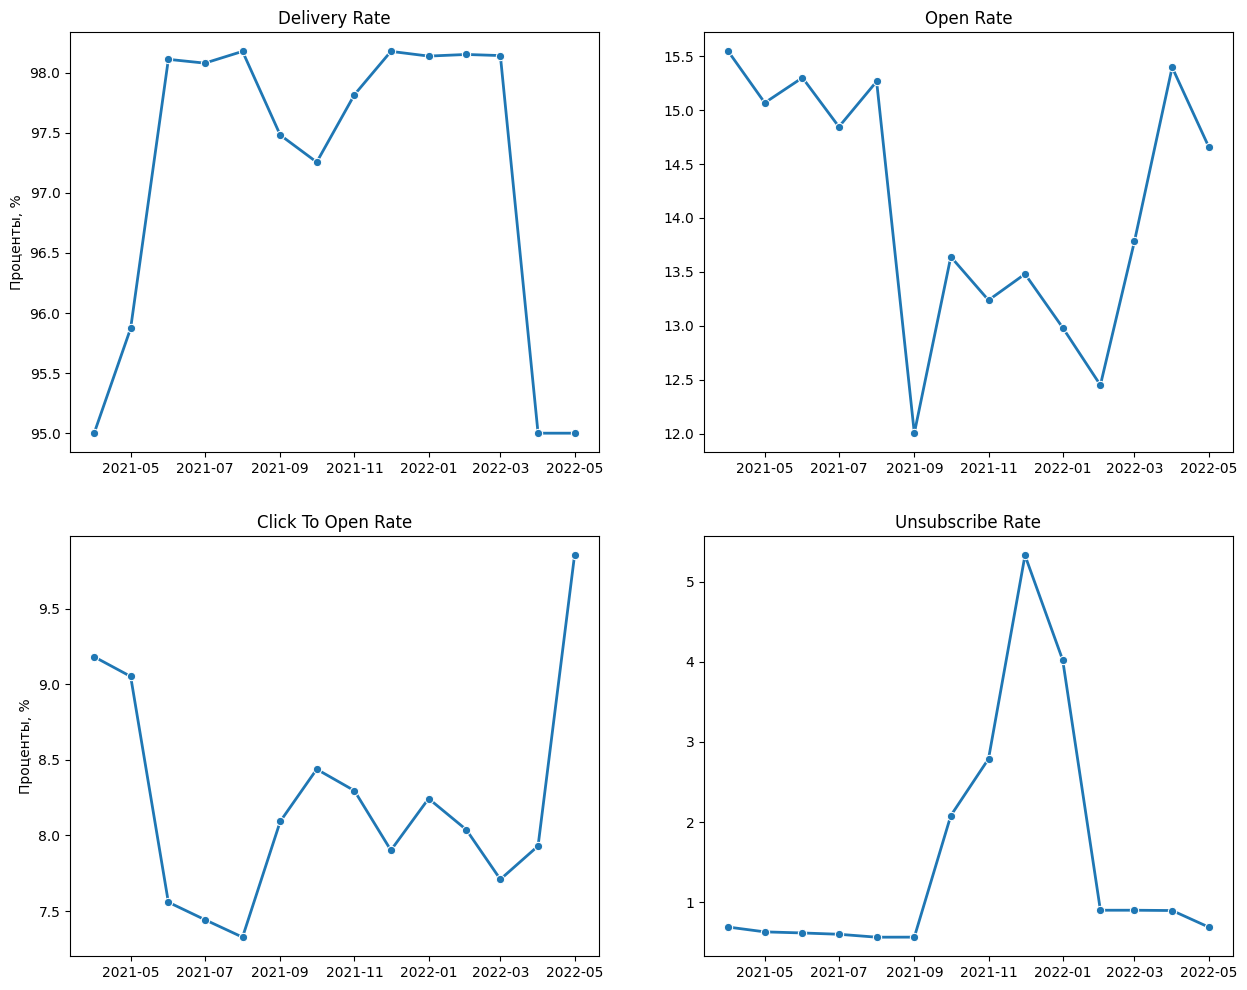

In [40]:
# графики
plt.figure(figsize=(15, 12))
ax = plt.subplot(2, 2, 1)
ax = sns.lineplot(data=df_metr,
                 y='DR',
                 x='year_month',
                 linewidth=2,
                 marker='o',
                 palette='tab10')
plt.title('Delivery Rate')
plt.xlabel(None)
plt.ylabel('Проценты, %')

ax = plt.subplot(2, 2, 2)
ax = sns.lineplot(data=df_metr,
                 y='OR',
                 x='year_month',
                 linewidth=2,
                 marker='o',
                 palette='tab10')
plt.title('Open Rate')
plt.xlabel(None)
plt.ylabel(None)

ax = plt.subplot(2, 2, 3)
ax = sns.lineplot(data=df_metr,
                 y='CTOR',
                 x='year_month',
                 linewidth=2,
                 marker='o',
                 palette='tab10')
plt.title('Click To Open Rate')
plt.xlabel(None)
plt.ylabel(None)
plt.ylabel('Проценты, %')

ax = plt.subplot(2, 2, 4)
ax = sns.lineplot(data=df_metr,
                 y='UR',
                 x='year_month',
                 linewidth=2,
                 marker='o',
                 palette='tab10')
plt.title('Unsubscribe Rate')
plt.xlabel(None)
plt.ylabel(None)

plt.show()

- DR - минимум 95%, что является хорошим показателем. В апреле и мае 21го и 22го наблюдаем низкие значения. Возможно были какие-то неполадки, стоит обратить внимание. Остальные месяцы не ниже 97%
- OR - 12%-15.54%. В апреле самые высокие показатели в оба года. Проседают 09.21 и 02.22
- CTOR - 7.33%-9.85%. Динамика скачкообразная
- UR - 0.5%-5.33%. 04.21-09.21 и 02.22-05.22 в пределах нормы (<1%), остальные месяцы высокие показатели

### Тема письма

Определим наилучшую тему письма для рассылки

In [26]:
# так как темы все уникальные и соответствуют каждой строке, то расчёт проведём по исходному дф
df_theme = pd.DataFrame()
df_theme['theme'] = df.theme
df_theme['DR'] = df.delivered/df.sent * 100
df_theme['OR'] = df.opened/df.delivered * 100
df_theme['CTOR'] = df.click/df.opened * 100
df_theme['UR'] = df.unsubscribe/df.delivered * 100
df_theme['CR'] = df.step_1/df.click * 100
df_theme

,theme,DR,OR,CTOR,UR,CR
0,1,95.00,20.00,12.00,1.00,35.60
1,10,95.00,18.00,9.00,1.00,32.14
2,100,95.00,16.00,8.40,1.00,21.97
3,101,95.00,20.00,3.90,1.00,49.54
4,102,95.00,18.00,7.20,1.00,17.92
...,...,...,...,...,...,...
213,95,98.50,17.43,3.90,0.90,49.54
214,96,98.00,11.05,7.20,0.90,17.92
215,97,98.00,9.20,12.00,0.90,40.46
216,98,98.50,11.05,9.00,0.90,51.50


In [27]:
df_theme.describe()

,theme,DR,OR,CTOR,UR,CR
count,218.00,218.00,218.00,218.00,218.00,218.00
mean,109.50,97.65,13.76,8.12,2.47,35.59
std,63.08,1.08,3.39,2.63,4.17,11.84
min,1.00,95.00,9.20,3.90,0.15,17.91
25%,55.25,98.00,11.05,7.20,0.57,21.97
50%,109.50,98.00,13.99,8.40,0.63,35.59
75%,163.75,98.50,17.43,9.00,0.90,49.54
max,218.00,98.50,20.00,12.00,13.00,51.51


- 50% DR (доставляемость) выше 98%, минимальное значение 95%, что уже является хорошим показателем, тч в качестве критерия рассматривать не будем
- 50% OR (открываемость) выше среднего (13.76%), диапозон 9.2%-20%
- 50% CTOR (кликабельность) выше среднего (8.12%), диапозон 3.9%-12%
- 75% UR (отписка) менее 1%, максимум 13%, что является аномально высоким показателем
- 50% CR (конверсия из клика в шаг 1) выше среднего (35.59%), диапозон 17.91%-51.51%

<a id='ur'></a>

In [28]:
# темы по которым аномально высокие значения отписок (UR)
df_theme.query('UR > 2')

,theme,DR,OR,CTOR,UR,CR
135,24,98.50,18.00,12.00,13.00,21.97
136,25,98.00,11.05,9.00,13.00,49.54
137,26,98.00,18.00,8.40,13.00,17.92
138,27,98.50,17.43,3.90,13.00,40.45
139,28,98.00,11.05,7.20,13.00,51.50
140,29,98.00,9.20,12.00,13.00,35.59
141,3,98.50,17.43,9.00,13.00,32.14
142,30,98.00,11.05,8.40,13.00,21.97
143,31,98.00,9.20,3.90,13.00,49.54
144,32,98.50,11.05,7.20,13.00,17.92


In [29]:
# найдём темы, у которых оптимальное сочетание метрик
df_theme.query('OR >= 14 & CTOR >= 9 & UR <= 0.5')

,theme,DR,OR,CTOR,UR,CR
101,190,98.00,18.00,9.00,0.34,49.54
105,194,98.50,17.43,12.00,0.34,35.59
110,199,98.00,17.43,12.00,0.34,40.46
120,207,98.50,17.43,12.00,0.28,32.14
131,217,98.00,17.43,9.00,0.15,40.46


Воронку продаж не рассматриваем, так как неизвестно что подразумевают шаги. К тому же зависит от продукта, может не подошёл сам продукт, цена или условия.  
По сочетанию OR (выше среднего и на 2.57% меньше максимального), CTOR (максимальный) и UR (0.28-0.34)  
**ТОП-3 лучших темы** для писем - 207, 199, 194

### День недели

Определим наилучшый день недели для рассылки

In [30]:
# суммируем и группируем
df_wd_sum = df.groupby(['weekday'], as_index=False)\
                       [['sent', 'delivered', 'opened', 'click', 'unsubscribe']].sum()

# дф с метриками по дням недели
df_weekday = pd.DataFrame()
df_weekday['weekday'] = df_wd_sum.weekday
df_weekday['DR'] = df_wd_sum.delivered/df_wd_sum.sent*100
df_weekday['OR'] = df_wd_sum.opened/df_wd_sum.delivered * 100
df_weekday['CTOR'] = df_wd_sum.click/df_wd_sum.opened * 100
df_weekday['UR'] = df_wd_sum.unsubscribe/df_wd_sum.delivered * 100
df_weekday

,weekday,DR,OR,CTOR,UR
0,1,97.98,13.76,8.17,4.60
1,2,97.47,13.18,8.68,2.63
2,3,97.60,14.28,8.39,1.25
3,4,97.74,13.59,7.83,2.02
4,5,97.67,13.33,7.95,2.97
5,6,97.39,13.55,7.43,0.56


По сочетанию показателей оптимальным днём недели для рассылки является вторник

## Выводы

- Данные за период с 04.21 по 05.22
- В воскресенье рассылка не проводится
- Уникальных тем для писем 218

`Метрики`  
Расчёт производился по месяцам каждого года.  

- DR - минимум 95%, что является хорошим показателем. В апреле и мае 21го и 22го наблюдаем низкие значения. Возможно были какие-то неполадки, стоит обратить внимание. Остальные месяцы не ниже 97%;
- OR - 12%-15.54%. В апреле самые высокие показатели в оба года (15.4% и 15.54%). Проседают 09.21 и 02.22;
- CTOR - 7.33%-9.85%. Динамика скачкообразная;
- UR - 0.5%-5.33%. С 04.21 по 09.21 и с 02.22 по 05.22 в пределах нормы (<1%), 10.21-02.22 высокие показатели.   
[Графики динамики метрик](#metr)  

`Тема письма`
- 50% DR (доставляемость) выше 98%, минимальное значение 95%, что уже является хорошим показателем, тч в качестве критерия рассматривать не будем;
- 50% OR (открываемость) выше среднего (13.76%), диапозон 9.2%-20%;
- 50% CTOR (кликабельность) выше среднего (8.12%), диапозон 3.9%-12%;
- 75% UR (отписка) менее 1%, максимум 13%, что является аномально высоким показателем;
- 50% CR (конверсия из клика в шаг 1) выше среднего (35.59%), диапозон 17.91%-51.51%.  

Воронку продаж не рассматриваем, так как неизвестно что подразумевают шаги. К тому же зависит от продукта, может не подошёл сам продукт, цена или условия.  
По сочетанию OR (выше среднего и на 2.57% меньше максимального), CTOR (максимальный) и UR (0.28-0.34)  
**ТОП-3 лучших темы** для писем - 207, 199, 194.  
[Темы писем с аномально высоким процентом отписок](#ur)

`День недели`  

Оптимальным днём недели для рассылки является вторник.